# Things covered in this notebook

- Importing data tables into pandas
- Examine aggregate hourly, daily, and monthly usage
- Examine usage for each day of the week
- Examine the difference between subscribers and non-subscribers
- Examine distribution of trip duration
- Examine usage at two different locations
- Examine variation in usage among different locations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data1 = pd.DataFrame.from_csv('./data/citibike_201604_201609.csv')     # data for April 2016 - September 2016
data2 = pd.DataFrame.from_csv('./data/citibike_201610_201703.csv')     # data for Ocotber 2016-March 2017

In [3]:
data1.head(3)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,...,start_month,start_day,start_hour,start_dayofweek,stop Time,stop_year,stop_month,stop_day,stop_hour,stop_dayofweek
0,496,2016-04-01 00:00:26,4/1/2016 00:08:42,254,W 11 St & 6 Ave,40.735324,-73.998004,236,St Marks Pl & 2 Ave,40.728419,...,4,1,0,4,2016-04-01 00:08:42,2016,4,1,0,4
1,104,2016-04-01 00:00:27,4/1/2016 00:02:12,311,Norfolk St & Broome St,40.717227,-73.988021,350,Clinton St & Grand St,40.715595,...,4,1,0,4,2016-04-01 00:02:12,2016,4,1,0,4
2,128,2016-04-01 00:00:30,4/1/2016 00:02:38,3064,Myrtle Ave & Lewis Ave,40.696820,-73.937569,3059,Pulaski St & Marcus Garvey Blvd,40.693398,...,4,1,0,4,2016-04-01 00:02:38,2016,4,1,0,4


In [4]:
data2.head(3)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,...,start_month,start_day,start_hour,start_dayofweek,stop Time,stop_year,stop_month,stop_day,stop_hour,stop_dayofweek
0,328,2016-10-01 00:00:07,2016-10-01 00:05:35,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,40.708771,...,10,1,0,5,2016-10-01 00:05:35,2016,10,1,0,5
1,398,2016-10-01 00:00:11,2016-10-01 00:06:49,3147,E 85 St & 3 Ave,40.778012,-73.954071,3140,1 Ave & E 78 St,40.771404,...,10,1,0,5,2016-10-01 00:06:49,2016,10,1,0,5
2,430,2016-10-01 00:00:14,2016-10-01 00:07:25,345,W 13 St & 6 Ave,40.736494,-73.997044,470,W 20 St & 8 Ave,40.743453,...,10,1,0,5,2016-10-01 00:07:25,2016,10,1,0,5


# Looking into the total usage of Citibikes over time (hourly, daily, and monthly)

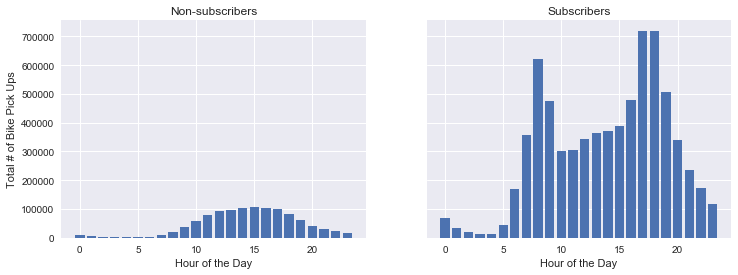

In [5]:
# Look at the distribution of usage by hour and by User type
usage_by_hour_usertype1 = data1.groupby(['start_hour','User Type']).size().unstack('User Type')
usage_by_hour_usertype2 = data2.groupby(['start_hour','User Type']).size().unstack('User Type')
ubyhour = pd.concat([usage_by_hour_usertype1, usage_by_hour_usertype2])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=True)
ax1.bar(ubyhour.index, ubyhour['Customer'])
ax2.bar(ubyhour.index, ubyhour['Subscriber'])
ax1.set_title('Non-subscribers')
ax2.set_title('Subscribers')
ax1.set_ylabel('Total # of Bike Pick Ups')
ax1.set_xlabel('Hour of the Day')
ax2.set_xlabel('Hour of the Day')

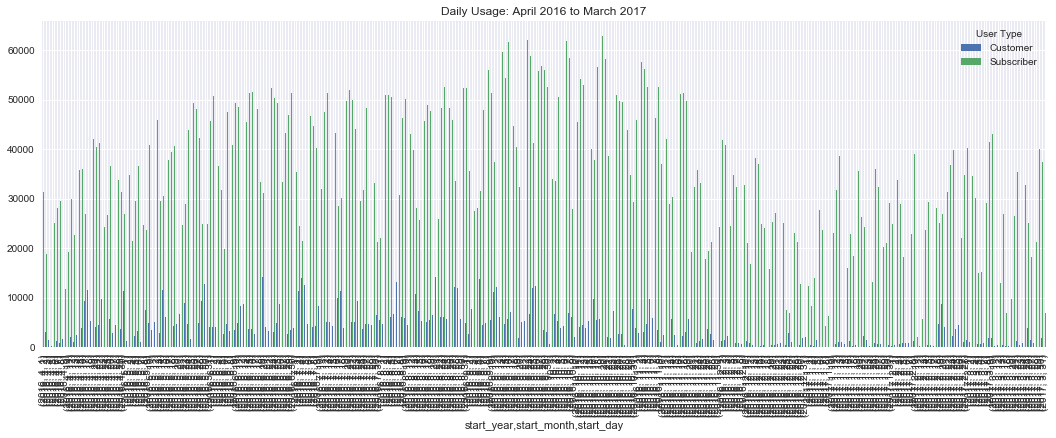

In [6]:
# Daily flucturations in usage
daily_usage1 = data1.groupby(['start_year', 'start_month', 'start_day', 'User Type']).size().unstack('User Type')
daily_usage2 = data2.groupby(['start_year', 'start_month', 'start_day', 'User Type']).size().unstack('User Type')
du = pd.concat([daily_usage1, daily_usage2])
du.plot(kind='bar', figsize=(18, 6), title='Daily Usage: April 2016 to March 2017')

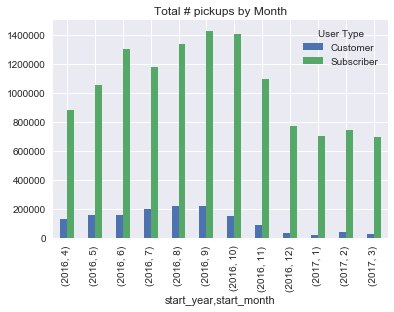

In [7]:
# Aggregate the daily usage plot by month
monthly_usage1 = data1.groupby(['start_year', 'start_month', 'User Type']).size().unstack('User Type')
monthly_usage2 = data2.groupby(['start_year', 'start_month', 'User Type']).size().unstack('User Type')
mu = pd.concat([monthly_usage1, monthly_usage2])
mu.plot(kind='bar', title='Total # pickups by Month')

# Examining the usage by the day of the week

In [8]:
# Usage distribution by the day of the week

# data for non-subscribers
z1c = data1[data1['User Type'] == 'Customer'].groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'User Type']).size().unstack('start_dayofweek')
z2c = data2[data2['User Type'] == 'Customer'].groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'User Type']).size().unstack('start_dayofweek')
zc = pd.concat([z1c, z2c])
zc.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# data for subscribers
z1s = data1[data1['User Type'] == 'Subscriber'].groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'User Type']).size().unstack('start_dayofweek')
z2s = data2[data2['User Type'] == 'Subscriber'].groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'User Type']).size().unstack('start_dayofweek')
zs = pd.concat([z1s, z2s])
zs.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

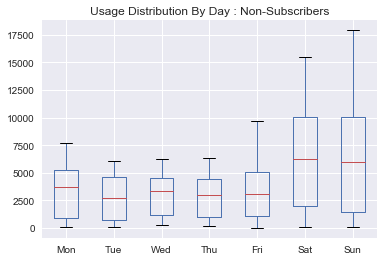

In [9]:
# Box plot the distribution for non-subscribers
zc.plot(kind='box',  title='Usage Distribution By Day : Non-Subscribers')

In [10]:
# Stat info for the distribution for non-subscribers
zc.describe(percentiles=[.25, .5, .75, .95]).round()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
count,52.0,51.0,51.0,50.0,53.0,52.0,52.0
mean,3512.0,2684.0,2933.0,2953.0,3312.0,6487.0,6223.0
std,2922.0,1982.0,1860.0,1865.0,2478.0,4670.0,4799.0
min,59.0,66.0,238.0,191.0,16.0,64.0,54.0
25%,888.0,748.0,1149.0,1015.0,1052.0,2014.0,1423.0
50%,3754.0,2761.0,3320.0,3025.0,3130.0,6217.0,6010.0
75%,5293.0,4600.0,4566.0,4418.0,5104.0,10078.0,10085.0
95%,6866.0,5720.0,5426.0,5707.0,6935.0,14123.0,13338.0
max,13847.0,6065.0,6295.0,6335.0,9741.0,15510.0,17916.0


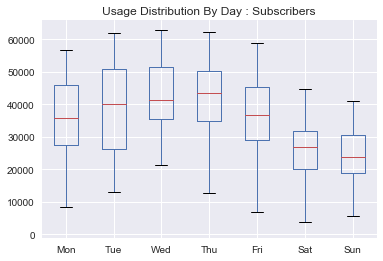

In [11]:
# Box plot the distribution for subscribers
zs.plot(kind='box',  title='Usage Distribution By Day : Subscribers')

In [12]:
# Stat info for the distribution for subscribers
zs.describe(percentiles=[.25, .5, .75, .95]).round()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
count,52.0,51.0,51.0,50.0,53.0,52.0,52.0
mean,35823.0,38968.0,43170.0,41902.0,35902.0,25182.0,23792.0
std,12070.0,13783.0,10393.0,11798.0,13228.0,9510.0,8900.0
min,8351.0,13084.0,21329.0,10236.0,1971.0,3934.0,5711.0
25%,27317.0,26150.0,35554.0,34763.0,28979.0,20016.0,18742.0
50%,35720.0,40197.0,41408.0,43297.0,36528.0,26859.0,23864.0
75%,45871.0,50668.0,51416.0,50139.0,45300.0,31640.0,30487.0
95%,52740.0,58185.0,58897.0,60104.0,56070.0,38779.0,38906.0
max,56551.0,61806.0,62733.0,62081.0,58814.0,44610.0,41135.0


# Looking into the trip duration

In [13]:
#Let's check duration distribution on each day
c1 = data1[data1['User Type'] ==  'Customer']
c2 = data2[data2['User Type'] ==  'Customer']
s1 = data1[data1['User Type'] ==  'Subscriber']
s2 = data2[data2['User Type'] ==  'Subscriber']
cust = pd.concat([c1, c2])
subs = pd.concat([s1, s2])

In [14]:
# Get a sense of Trip duration distribution for non-subscribers
(cust['Trip Duration']/60).describe(percentiles=[.25, .5, .75, .95, .99]).round()

count    1453178.0
mean          34.0
std          333.0
min            1.0
25%           14.0
50%           21.0
75%           29.0
95%           66.0
99%          188.0
max       111792.0
Name: Trip Duration, dtype: float64

(-10, 210)

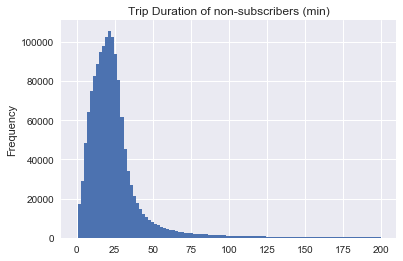

In [17]:
ax = (cust[cust['Trip Duration'] < 12000]['Trip Duration']/60)\
            .plot.hist(bins=100, title='Trip Duration of non-subscribers (min)')
ax.set_xlim([-10, 210])

In [18]:
# Get a sense of Trip duration distribution for subscribers
(subs['Trip Duration']/60).describe(percentiles=[.25, .5, .75, .95, .99]).round()

count    12596412.0
mean           13.0
std           126.0
min             1.0
25%             6.0
50%            10.0
75%            16.0
95%            31.0
99%            43.0
max        148893.0
Name: Trip Duration, dtype: float64

(-10, 210)

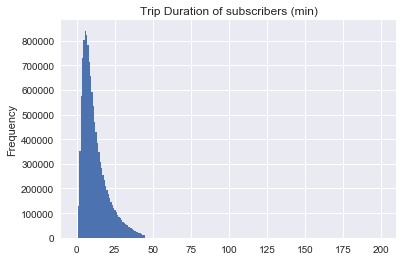

In [19]:
ax = (subs[subs['Trip Duration'] < 2700]['Trip Duration']/60)\
            .plot.hist(bins=50, title='Trip Duration of subscribers (min)')
ax.set_xlim([-10, 210])

In [20]:
# Look at the trip duration of non-subscrivers by the day of the week
cd0 = cust[cust['start_dayofweek'] == 0]['Trip Duration'].reset_index(drop=True)
cd1 = cust[cust['start_dayofweek'] == 1]['Trip Duration'].reset_index(drop=True)
cd2 = cust[cust['start_dayofweek'] == 2]['Trip Duration'].reset_index(drop=True)
cd3 = cust[cust['start_dayofweek'] == 3]['Trip Duration'].reset_index(drop=True)
cd4 = cust[cust['start_dayofweek'] == 4]['Trip Duration'].reset_index(drop=True)
cd5 = cust[cust['start_dayofweek'] == 5]['Trip Duration'].reset_index(drop=True)
cd6 = cust[cust['start_dayofweek'] == 6]['Trip Duration'].reset_index(drop=True)
cd = pd.concat([cd0, cd1, cd2, cd3, cd4, cd5, cd6], axis=1)
cd.columns=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
cd = cd/60

In [21]:
# Check basic stats by day of the week
cd.describe(percentiles=[.25, .5, .75, .95, .99]).round()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
count,182629.0,136885.0,149577.0,147668.0,175542.0,337301.0,323576.0
mean,32.0,33.0,35.0,33.0,36.0,34.0,35.0
std,208.0,361.0,434.0,265.0,470.0,242.0,343.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,14.0,13.0,13.0,13.0,14.0,15.0,15.0
50%,21.0,21.0,21.0,21.0,21.0,22.0,22.0
75%,29.0,28.0,29.0,29.0,29.0,30.0,30.0
95%,65.0,63.0,64.0,64.0,64.0,66.0,69.0
99%,180.0,178.0,187.0,195.0,191.0,192.0,190.0
max,30236.0,81783.0,111792.0,57095.0,102952.0,57104.0,100896.0


(-5, 60)

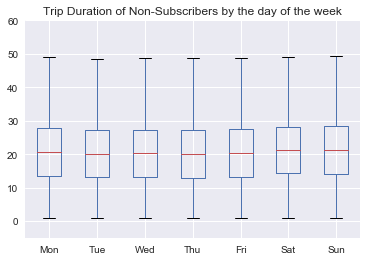

In [23]:
# Check the non-subscribers
cd_pruned = cd[cd < 70]
ax = cd_pruned.plot(kind='box', title='Trip Duration of Non-Subscribers by the day of the week')
ax.set_ylim([-5, 60])

In [24]:
# Look at trip duration of subscribers by the day of the week
sd0 = subs[subs['start_dayofweek'] == 0]['Trip Duration'].reset_index(drop=True)
sd1 = subs[subs['start_dayofweek'] == 1]['Trip Duration'].reset_index(drop=True)
sd2 = subs[subs['start_dayofweek'] == 2]['Trip Duration'].reset_index(drop=True)
sd3 = subs[subs['start_dayofweek'] == 3]['Trip Duration'].reset_index(drop=True)
sd4 = subs[subs['start_dayofweek'] == 4]['Trip Duration'].reset_index(drop=True)
sd5 = subs[subs['start_dayofweek'] == 5]['Trip Duration'].reset_index(drop=True)
sd6 = subs[subs['start_dayofweek'] == 6]['Trip Duration'].reset_index(drop=True)
sd = pd.concat([sd0, sd1, sd2, sd3, sd4, sd5, sd6], axis=1)
sd.columns=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sd = sd/60

In [25]:
# basic stats for the subscribers
sd.describe(percentiles=[.25, .5, .75, .95, .99, .999]).round()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
count,1862781.0,1987360.0,2201654.0,2095102.0,1902828.0,1309480.0,1237207.0
mean,13.0,13.0,13.0,13.0,13.0,15.0,14.0
std,101.0,144.0,122.0,133.0,102.0,125.0,158.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,6.0,6.0,6.0,6.0,6.0,6.0,6.0
50%,10.0,10.0,10.0,10.0,10.0,10.0,10.0
75%,16.0,16.0,16.0,16.0,16.0,17.0,17.0
95%,30.0,30.0,30.0,30.0,30.0,33.0,34.0
99%,43.0,42.0,42.0,42.0,43.0,48.0,48.0
99.9%,174.0,155.0,149.0,154.0,192.0,233.0,219.0


(-5, 60)

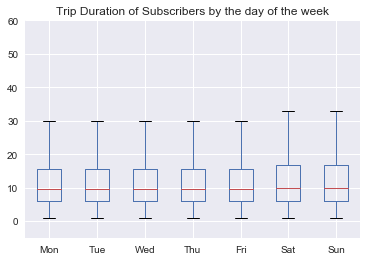

In [26]:
# Check the subscribers
sd_pruned = sd[sd < 50]
ax = sd_pruned.plot(kind='box', title='Trip Duration of Subscribers by the day of the week')
ax.set_ylim([-5, 60])

# Quick look at usage by location: Pershing Sq North

In [27]:
loc1 = data1.groupby('Start Station Name').size()
loc2 = data2.groupby('Start Station Name').size()
loc = loc1.add(loc2, fill_value=0)

In [28]:
print('Most Popular Locations')
print(loc.sort_values(ascending=False).head(10))

Most Popular Locations
Start Station Name
Pershing Square North       152325.0
E 17 St & Broadway          100818.0
W 21 St & 6 Ave              99869.0
Broadway & E 22 St           99623.0
West St & Chambers St        97196.0
8 Ave & W 33 St              86724.0
Broadway & E 14 St           83997.0
Greenwich Ave & 8 Ave        80905.0
W 20 St & 11 Ave             80031.0
Cleveland Pl & Spring St     78861.0
dtype: float64


In [29]:
print('Least Popular Locations')
print(loc.sort_values(ascending=True).head(10))

Least Popular Locations
Start Station Name
2 Ave & E 105 St                                   1.0
NYCBS Depot - STY - Valet Scan                     2.0
Kiosk in a box Deployment                          7.0
3969.TEMP (Bike The Branches - Central Branch)     9.0
8D OPS 01                                         11.0
NYCBS Depot - FAR                                 17.0
SSP Tech Workshop                                 18.0
Marcy Ave & MacDonough St                         20.0
Bike The Branches - Red Hook Branch               20.0
10 Hudson Yards                                   21.0
dtype: float64


In [30]:
#  Look at the busiest location
pershing1 = data1[data1['Start Station Name'] == 'Pershing Square North']
pershing2 = data2[data2['Start Station Name'] == 'Pershing Square North']
pershing = pd.concat([pershing1, pershing2])

In [31]:
pershing.head(3)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,...,start_month,start_day,start_hour,start_dayofweek,stop Time,stop_year,stop_month,stop_day,stop_hour,stop_dayofweek
31,1151,2016-04-01 00:04:34,4/1/2016 00:23:45,519,Pershing Square North,40.751873,-73.977706,3177,W 84 St & Broadway,40.786795,...,4,1,0,4,2016-04-01 00:23:45,2016,4,1,0,4
98,492,2016-04-01 00:15:28,4/1/2016 00:23:41,519,Pershing Square North,40.751873,-73.977706,475,E 16 St & Irving Pl,40.735243,...,4,1,0,4,2016-04-01 00:23:41,2016,4,1,0,4
165,595,2016-04-01 00:28:07,4/1/2016 00:38:03,519,Pershing Square North,40.751873,-73.977706,475,E 16 St & Irving Pl,40.735243,...,4,1,0,4,2016-04-01 00:38:03,2016,4,1,0,4


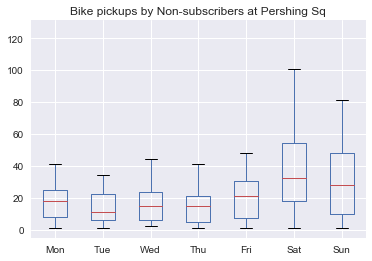

In [32]:
# Boxplot the Non-subscriber data at Pershing Sq
pershing_dofw_c = pershing[pershing['User Type'] == 'Customer'] \
        .groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'User Type']).size().unstack('start_dayofweek')
pershing_dofw_c.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pershing_dofw_c.plot(kind='box', title='Bike pickups by Non-subscribers at Pershing Sq')

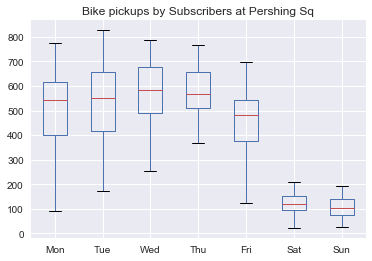

In [33]:
# Boxplot the Subscriber data at Pershing Sq
pershing_dofw_s = pershing[pershing['User Type'] == 'Subscriber'] \
        .groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'User Type']).size().unstack('start_dayofweek')
pershing_dofw_s.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pershing_dofw_s.plot(kind='box', title='Bike pickups by Subscribers at Pershing Sq')

In [34]:
# usage stats for Pershing Sq. North
pershing_dofw_s.describe().round()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
count,52.0,51.0,51.0,50.0,53.0,52.0,52.0
mean,483.0,529.0,574.0,561.0,445.0,117.0,105.0
std,192.0,168.0,122.0,143.0,159.0,45.0,41.0
min,49.0,171.0,255.0,66.0,26.0,22.0,25.0
25%,402.0,418.0,490.0,510.0,374.0,93.0,75.0
50%,544.0,551.0,584.0,567.0,480.0,120.0,102.0
75%,615.0,656.0,676.0,657.0,543.0,154.0,140.0
max,774.0,827.0,789.0,768.0,697.0,208.0,193.0


# Quick look at usage by location: My neighborhood

In [35]:
my_loc1 = data1[data1['Start Station Name'] == '3 Ave & E 71 St']
my_loc2 = data2[data2['Start Station Name'] == '3 Ave & E 71 St']
my_loc = pd.concat([my_loc1, my_loc2])

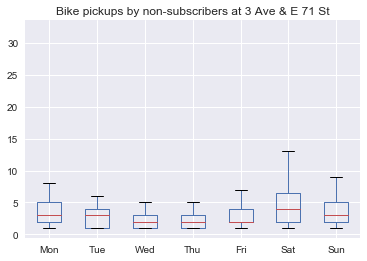

In [36]:
# Boxplot usage by subscribers
my_loc_dofw_s = my_loc[my_loc['User Type'] == 'Customer'] \
        .groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'User Type']).size().unstack('start_dayofweek')
my_loc_dofw_s.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
my_loc_dofw_s.plot(kind='box', title='Bike pickups by non-subscribers at 3 Ave & E 71 St')

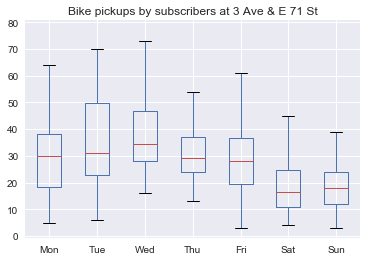

In [38]:
my_loc_dofw_s = my_loc[my_loc['User Type'] == 'Subscriber'] \
        .groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'User Type']).size().unstack('start_dayofweek')
my_loc_dofw_s.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
my_loc_dofw_s.plot(kind='box', title='Bike pickups by subscribers at 3 Ave & E 71 St')

In [39]:
my_loc_dofw_s.describe().round()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
count,43.0,42.0,42.0,41.0,43.0,42.0,41.0
mean,30.0,35.0,38.0,33.0,30.0,19.0,20.0
std,14.0,17.0,15.0,14.0,17.0,9.0,12.0
min,5.0,6.0,16.0,13.0,3.0,4.0,3.0
25%,18.0,23.0,28.0,24.0,20.0,11.0,12.0
50%,30.0,31.0,34.0,29.0,28.0,16.0,18.0
75%,38.0,50.0,47.0,37.0,36.0,25.0,24.0
max,64.0,70.0,75.0,74.0,77.0,45.0,62.0


# Look at how usage vary by location

In [40]:
# location based usage by the day of the week for non-subscribers
ubyloc_c = cust.groupby(['Start Station Name', 'start_dayofweek']).size().unstack('start_dayofweek')
ubyloc_c.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ubyloc_c['Total Usage'] = ubyloc_c.sum(axis=1)
ubyloc_c.sort_values('Total Usage', ascending=False).head(3)

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Total Usage
Start Station Name,,,,,,,,
Central Park S & 6 Ave,5410.0,3806.0,4396.0,4264.0,4832.0,8967.0,9370.0,41045.0
Centre St & Chambers St,3646.0,2616.0,2908.0,2735.0,3096.0,6098.0,5757.0,26856.0
12 Ave & W 40 St,2779.0,2011.0,2351.0,2198.0,2959.0,5820.0,5528.0,23646.0


In [41]:
ubyloc_c.describe(percentiles=[.25, .5, .75, .95, .99]).round()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Total Usage
count,638.0,636.0,644.0,643.0,639.0,645.0,639.0,650.0
mean,286.0,215.0,232.0,230.0,275.0,523.0,506.0,2236.0
std,452.0,327.0,361.0,349.0,419.0,796.0,791.0,3460.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
25%,48.0,38.0,38.0,40.0,48.0,97.0,96.0,397.0
50%,154.0,118.0,124.0,127.0,144.0,288.0,288.0,1226.0
75%,351.0,266.0,287.0,288.0,344.0,636.0,609.0,2704.0
95%,965.0,685.0,720.0,753.0,891.0,1729.0,1560.0,7306.0
99%,2318.0,1745.0,1965.0,1866.0,2363.0,4384.0,4375.0,18937.0
max,5410.0,3806.0,4396.0,4264.0,4832.0,8967.0,9370.0,41045.0


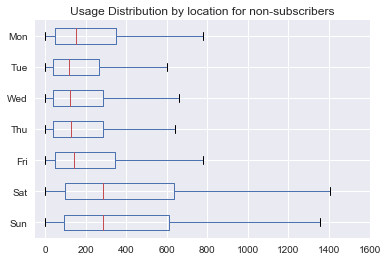

In [56]:
ubyloc_c[['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon']].plot(kind='box', \
                    vert=False, title='Usage Distribution by location for non-subscribers', xlim=[-50, 1600])

In [47]:
# location based usage by the day of the week for ubscribers
ubyloc_s = subs.groupby(['Start Station Name', 'start_dayofweek']).size().unstack('start_dayofweek')
ubyloc_s.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ubyloc_s['Total Usage'] = ubyloc_s.sum(axis=1)
ubyloc_s.sort_values('Total Usage', ascending=False).head(3)

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Total Usage
Start Station Name,,,,,,,,
Pershing Square North,25111.0,26962.0,29262.0,28038.0,23588.0,6083.0,5461.0,144505.0
W 21 St & 6 Ave,15152.0,15099.0,16350.0,15128.0,13923.0,10275.0,10315.0,96242.0
Broadway & E 22 St,14746.0,16010.0,17708.0,17192.0,14405.0,7253.0,6690.0,94004.0


In [48]:
ubyloc_c.describe(percentiles=[.25, .5, .75, .95, .99]).round()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Total Usage
count,638.0,636.0,644.0,643.0,639.0,645.0,639.0,650.0
mean,286.0,215.0,232.0,230.0,275.0,523.0,506.0,2236.0
std,452.0,327.0,361.0,349.0,419.0,796.0,791.0,3460.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
25%,48.0,38.0,38.0,40.0,48.0,97.0,96.0,397.0
50%,154.0,118.0,124.0,127.0,144.0,288.0,288.0,1226.0
75%,351.0,266.0,287.0,288.0,344.0,636.0,609.0,2704.0
95%,965.0,685.0,720.0,753.0,891.0,1729.0,1560.0,7306.0
99%,2318.0,1745.0,1965.0,1866.0,2363.0,4384.0,4375.0,18937.0
max,5410.0,3806.0,4396.0,4264.0,4832.0,8967.0,9370.0,41045.0


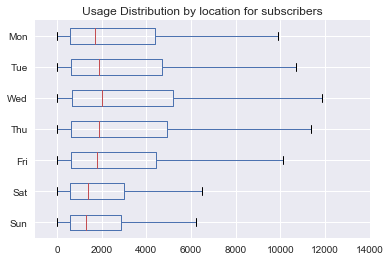

In [59]:
ax = ubyloc_s[['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon']].plot(kind='box', \
            vert=False, xlim=[-1000, 14000], title='Usage Distribution by location for subscribers')

# More location variation in usage on weekends for no-subscribers, where as the opposite is true for subscribers

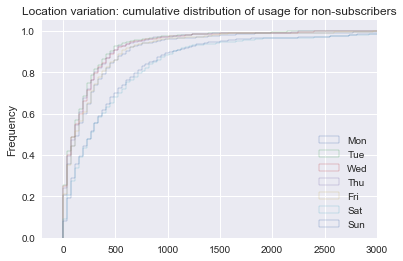

In [62]:
# Cumulative distribution for non-subscribers
ax = ubyloc_c[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']].plot(\
                                    kind='hist', bins=250, xlim=[-200, 3000], histtype='step', \
                                    cumulative=True, normed=True, \
                                    title='Location variation: cumulative distribution of usage for non-subscribers')
ax.legend(loc='lower right')

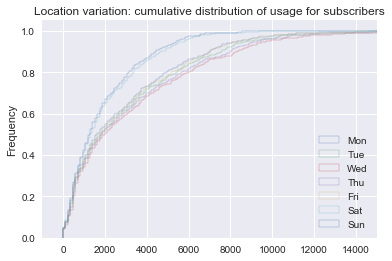

In [63]:
ax = ubyloc_s[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']].plot(\
                                                                 kind='hist', bins=250, xlim=[-1000, 15000], histtype='step', \
                                                                 cumulative=True, normed=True,\
                                                                 title='Location variation: cumulative distribution of usage for subscribers')
ax.legend(loc='lower right')